In [1]:
import numpy as np
import pandas as pd

df_train=pd.read_csv('./train.csv')

df_train.head()

,Id,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,required_doughnuts_comsumption,fraudulent
0,0,5737,Jr. Business Analyst & Quality Analyst (entry...,"US, NJ, PISCATAWAY",NaN,NaN,NaN,"Duration: Full time / W2Location: Piscataway,N...",What we require:-- Masters degree in Computers...,NaN,0,0,0,Full-time,Entry level,Master's Degree,Financial Services,Finance,-0.410911,0
1,1,7107,English Teacher Abroad,"US, PA, Scranton",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,-0.163785,0
2,2,11979,SQL Server Database Developer Job opportunity ...,"US, IL, Barrington",NaN,90000-100000,We are an innovative personnel-sourcing firm w...,Position : SQL Server Database DeveloperJob Lo...,Position : SQL Server Database DeveloperJob Lo...,Benefits - FullBonus Eligible - Yes,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,-0.244369,0
3,3,9375,Legal Analyst - 12 Month FTC,"GB, LND, London",Legal,NaN,MarketInvoice is one of the most high-profile ...,DescriptionOur mission at MarketInvoice is to ...,Duties and ResponsibilitiesReviewing contractu...,Competitive salaryPrivate HealthcareHalf price...,0,1,0,Full-time,Associate,Professional,Financial Services,Legal,-0.456807,0
4,4,1301,Part-Time Finance Assistant,"GB, LND,",NaN,NaN,NaN,Salary:£9 - £10 per hour We are currently goin...,"Your role will be a varied, interesting and in...",Salary:£9 - £10 per hour,0,0,0,Part-time,NaN,NaN,Accounting,NaN,-0.217880,0


In [25]:
df = df_train.loc[:,['Id','job_id','salary_range','fraudulent']]

df[['min_salary','max_salary']] = df['salary_range'].str.split('-', 1,expand=True)
df[['job_id','min_salary','max_salary','fraudulent']].apply(pd.to_numeric,errors='coerce')

,job_id,min_salary,max_salary,fraudulent
0,5737,NaN,NaN,0
1,7107,NaN,NaN,0
2,11979,90000.0,100000.0,0
3,9375,NaN,NaN,0
4,1301,NaN,NaN,0
...,...,...,...,...
10723,11225,NaN,NaN,0
10724,7567,NaN,NaN,0
10725,9098,NaN,NaN,0
10726,4821,NaN,NaN,0


In [33]:
df['has_salary_range']=df['salary_range'].notnull().astype(int)
df.head()

,Id,job_id,salary_range,fraudulent,min_salary,max_salary,has_salary_range
0,0,5737,NaN,0,NaN,NaN,0
1,1,7107,NaN,0,NaN,NaN,0
2,2,11979,90000-100000,0,90000,100000,1
3,3,9375,NaN,0,NaN,NaN,0
4,4,1301,NaN,0,NaN,NaN,0


In [43]:
df['salary_string_len']=df['salary_range'].fillna('-').astype(str).apply(len) -1

In [46]:
df['average_salary'] = (df['min_salary'].apply(pd.to_numeric,errors='coerce') + df['max_salary'].apply(pd.to_numeric,errors='coerce')) / 2

In [48]:
df['salary_std'] = (df['max_salary'].apply(pd.to_numeric,errors='coerce') - df['min_salary'].apply(pd.to_numeric,errors='coerce'))

In [50]:
# probably better than std!!, because it is normalized and it decreases for higher discrepancies!
# i.e. 
df['salary_ratio'] = (df['min_salary'].apply(pd.to_numeric,errors='coerce') / df['max_salary'].apply(pd.to_numeric,errors='coerce'))

In [51]:
df

,Id,job_id,salary_range,fraudulent,min_salary,max_salary,has_salary_range,salary_string_len,average_salary,salary_std,salary_ratio
0,0,5737,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN
1,1,7107,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN
2,2,11979,90000-100000,0,90000,100000,1,11,95000.0,10000.0,0.9
3,3,9375,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN
4,4,1301,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10723,10723,11225,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN
10724,10724,7567,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN
10725,10725,9098,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN
10726,10726,4821,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN


In [56]:
df_features = df.loc[:,['Id','min_salary','max_salary','has_salary_range','salary_string_len','average_salary','salary_std','salary_ratio']]

In [60]:
df_features.fillna(0,inplace=True)

In [61]:
df_features

,Id,min_salary,max_salary,has_salary_range,salary_string_len,average_salary,salary_std,salary_ratio
0,0,0,0,0,0,0.0,0.0,0.0
1,1,0,0,0,0,0.0,0.0,0.0
2,2,90000,100000,1,11,95000.0,10000.0,0.9
3,3,0,0,0,0,0.0,0.0,0.0
4,4,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10723,10723,0,0,0,0,0.0,0.0,0.0
10724,10724,0,0,0,0,0.0,0.0,0.0
10725,10725,0,0,0,0,0.0,0.0,0.0
10726,10726,0,0,0,0,0.0,0.0,0.0


In [79]:
cols=df_features.columns
df_normalized = df_features[['Id']]
for i in range(1,len(cols)):
    df_normalized.loc[:,cols[i]] = df_features[cols[i]].apply(pd.to_numeric,errors='coerce')/np.max(df_features[cols[i]].apply(pd.to_numeric,errors='coerce'))

C:\Users\Uni\AppData\Local\Temp\ipykernel_11088\1987790817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized.loc[:,cols[i]] = df_features[cols[i]].apply(pd.to_numeric,errors='coerce')/np.max(df_features[cols[i]].apply(pd.to_numeric,errors='coerce'))
C:\Users\Uni\AppData\Local\Temp\ipykernel_11088\1987790817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized.loc[:,cols[i]] = df_features[cols[i]].apply(pd.to_numeric,errors='coerce')/np.max(df_features[cols[i]].apply(pd.to_numeri

In [80]:
df_normalized.head()

,Id,min_salary,max_salary,has_salary_range,salary_string_len,average_salary,salary_std,salary_ratio
0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,2,0.014362,0.006061,1.0,0.785714,0.011411,0.000612,0.9
3,3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


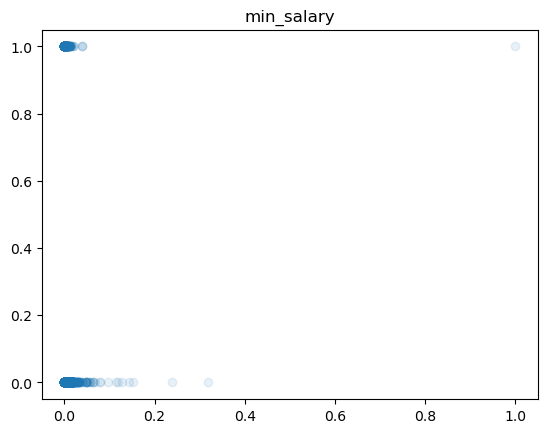

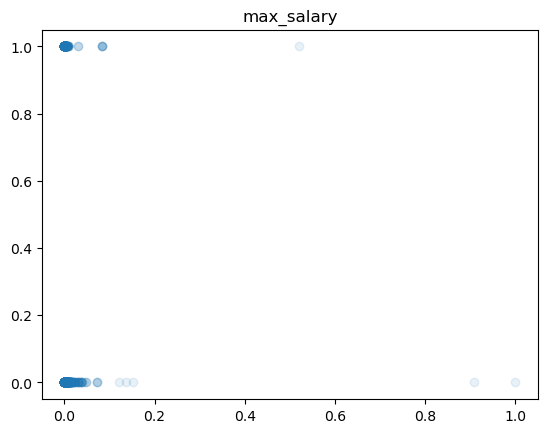

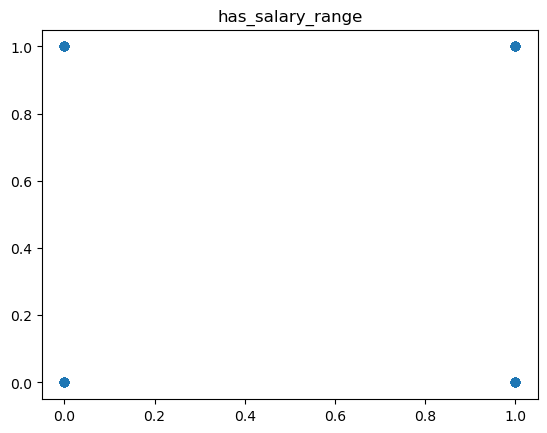

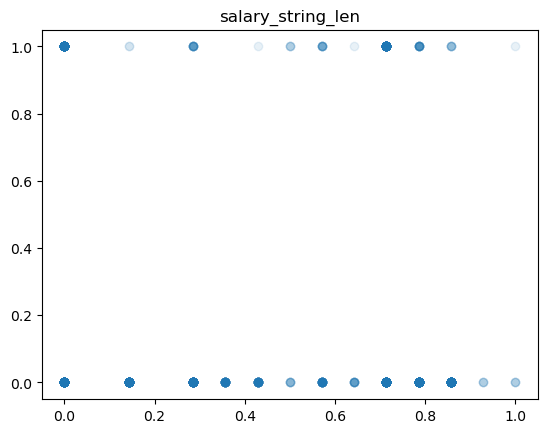

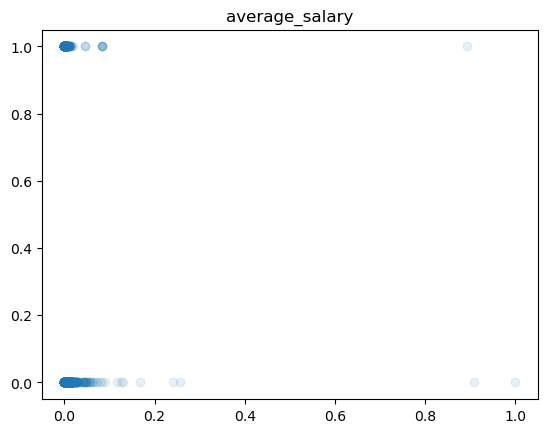

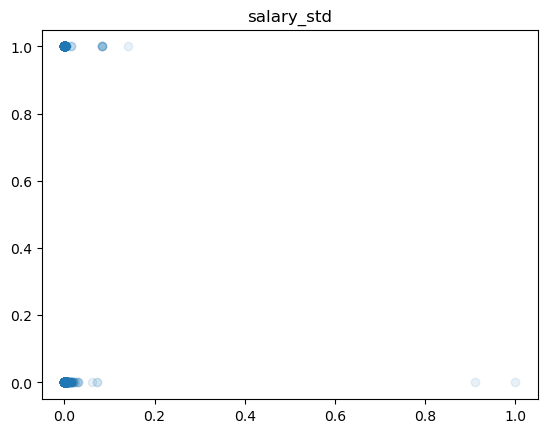

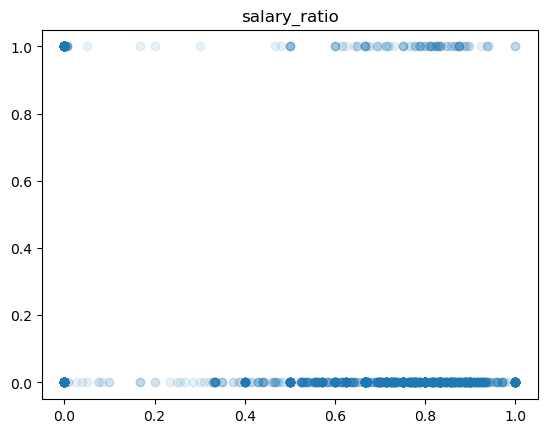

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(1,len(cols)):
    fig= plt.figure()
    plt.plot(df_normalized[cols[i]],df_train['fraudulent'],'o',alpha=0.1)
    plt.title(cols[i])
#plt.plot(df_normalized["salary_ratio"],df_train['fraudulent'],'o')
plt.show()

In [91]:
df_normalized_fraud = df_normalized[df_train['fraudulent']==1]
df_normalized_job = df_normalized[df_train['fraudulent']==0]

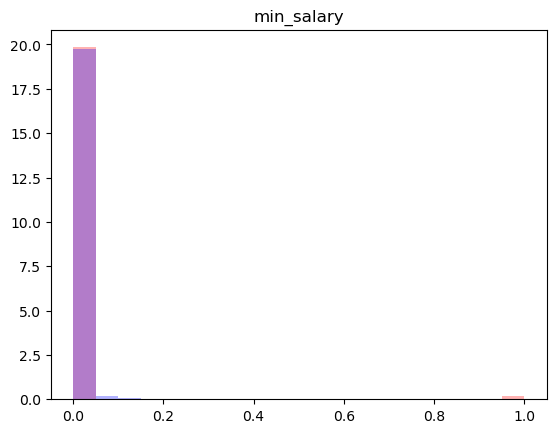

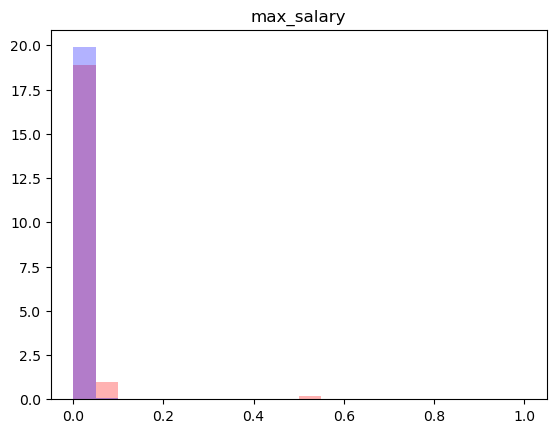

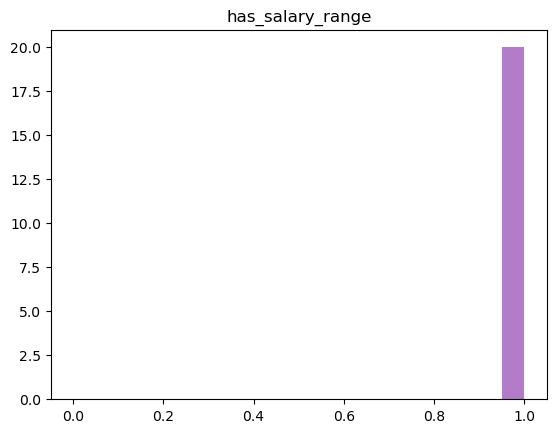

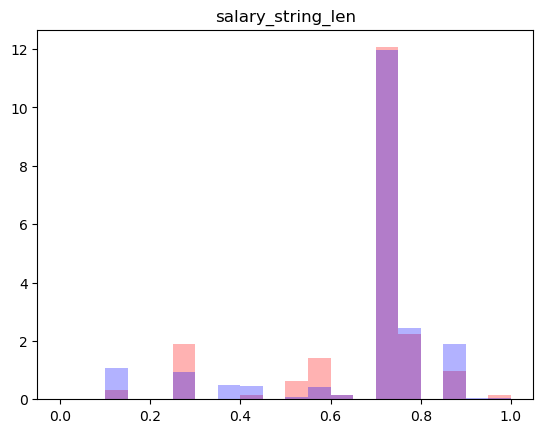

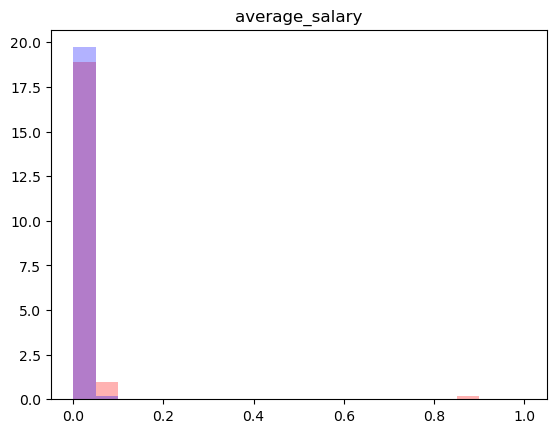

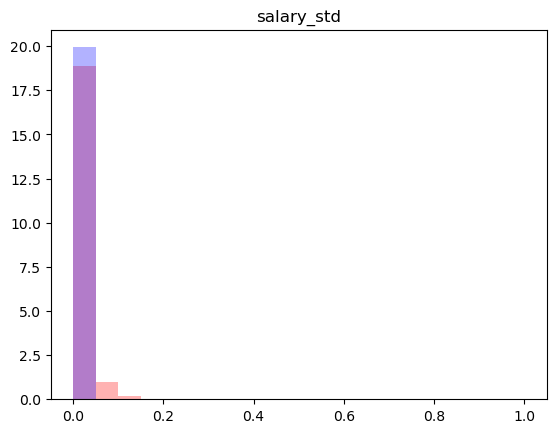

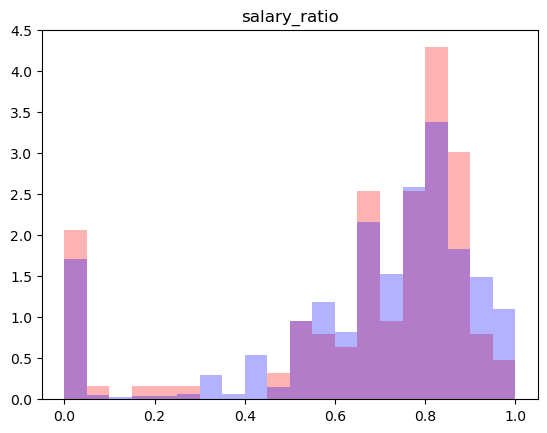

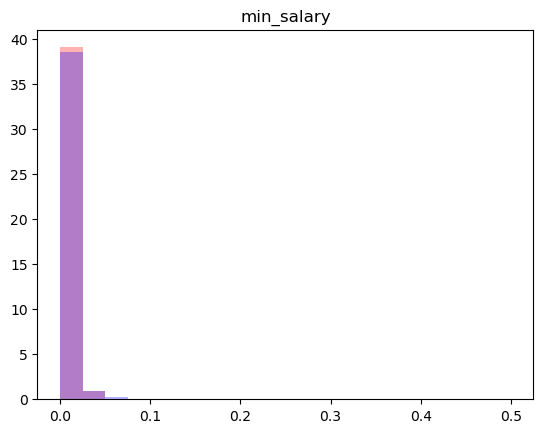

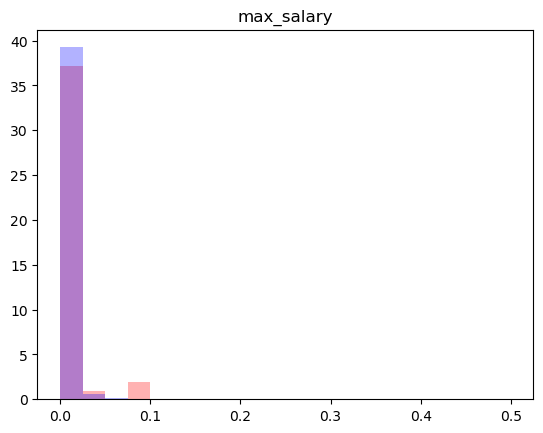

In [104]:
for i in range(1,len(cols)):
    fig= plt.figure()
    plt.hist(df_normalized_fraud[cols[i]],bins=20,density=True,alpha=0.3,color='red',range=(0,1))
    plt.hist(df_normalized_job[cols[i]],bins=20,density=True,alpha=0.3,color='blue',range=(0,1))
    plt.title(cols[i])
#plt.plot(df_normalized["salary_ratio"],df_train['fraudulent'],'o')
plt.show()
for i in range(1,3):
    fig=plt.figure()
    plt.hist(df_normalized_fraud[cols[i]],bins=20,density=True,alpha=0.3,color='red',range=(0,0.5))
    plt.hist(df_normalized_job[cols[i]],bins=20,density=True,alpha=0.3,color='blue',range=(0,0.5))
    plt.title(cols[i])
plt.show()

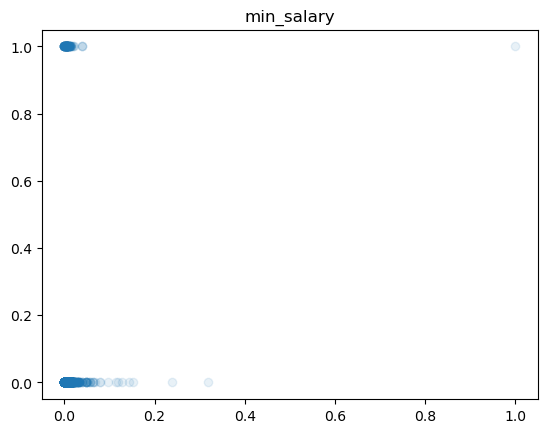

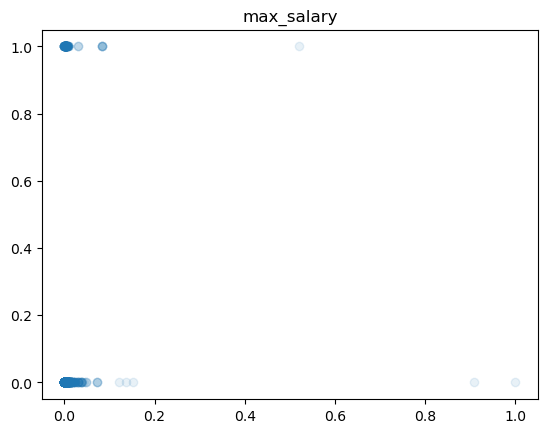

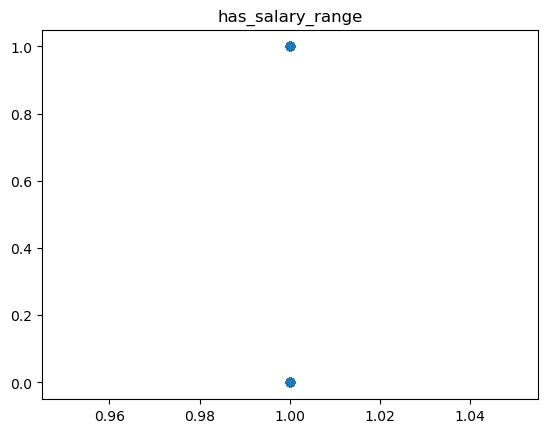

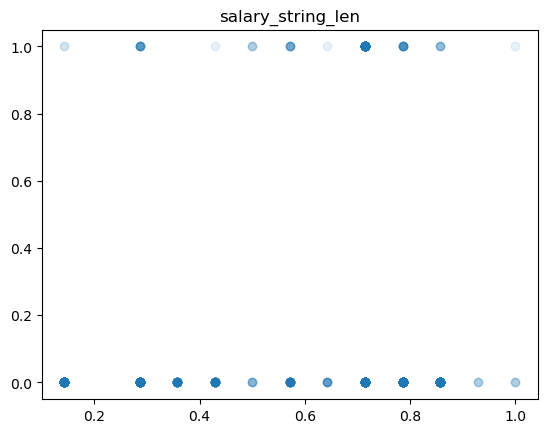

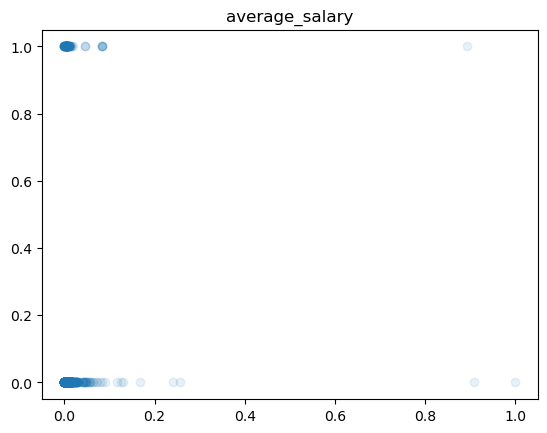

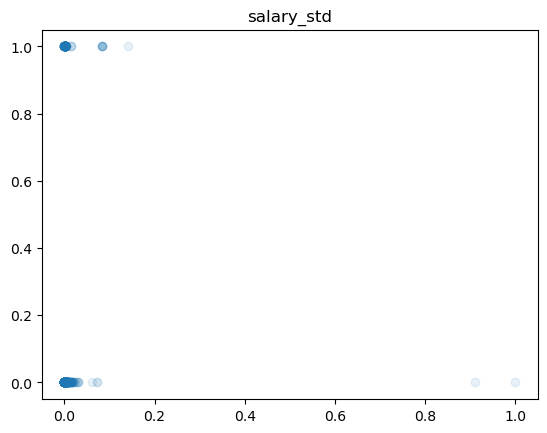

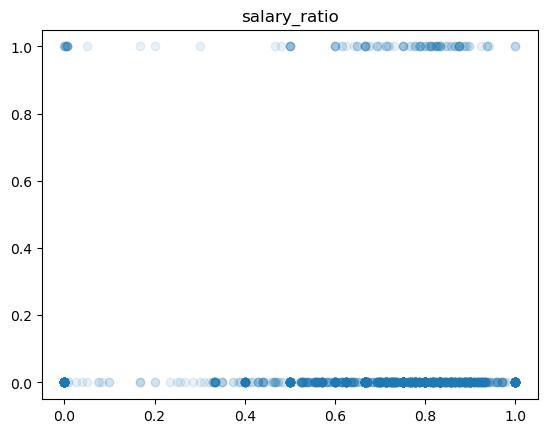

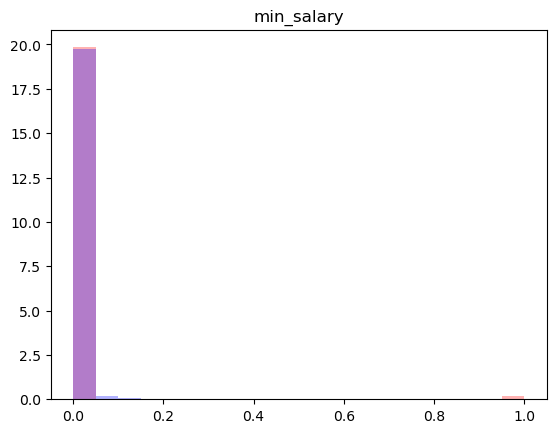

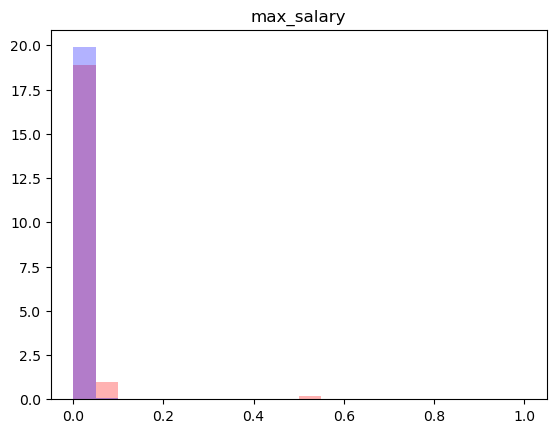

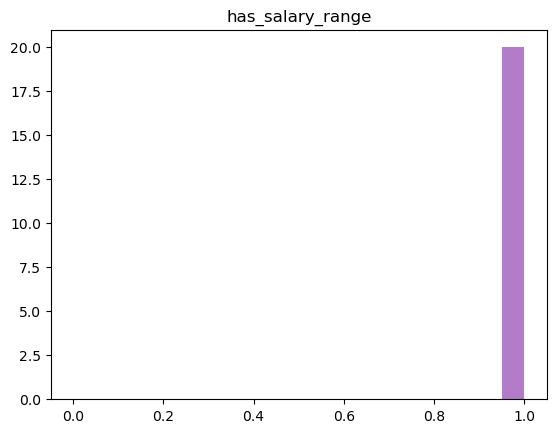

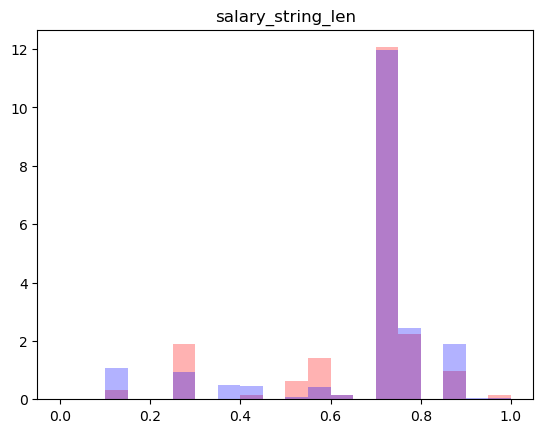

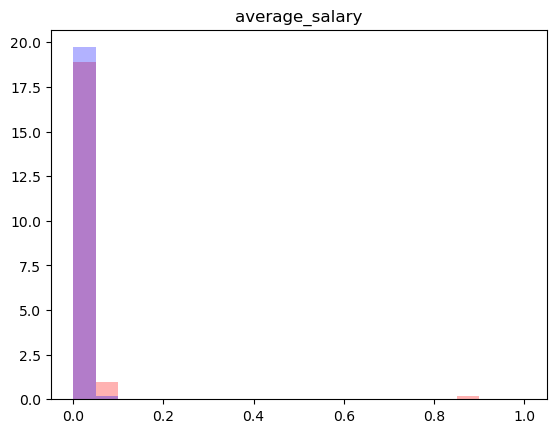

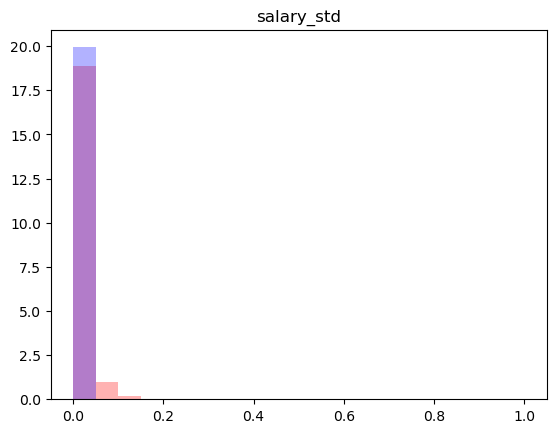

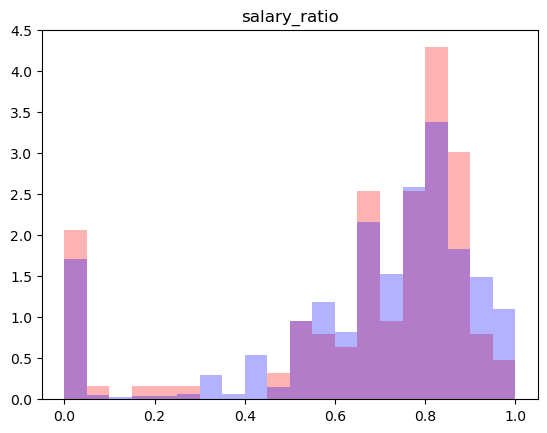

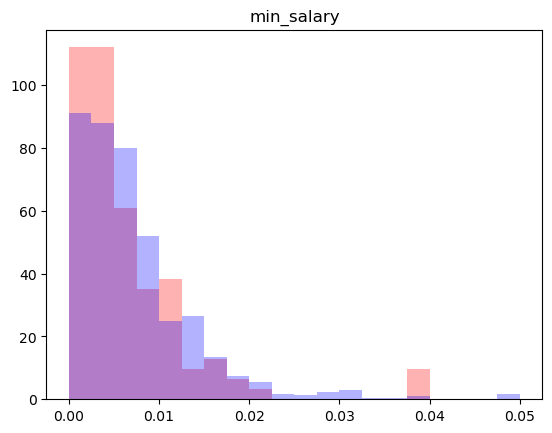

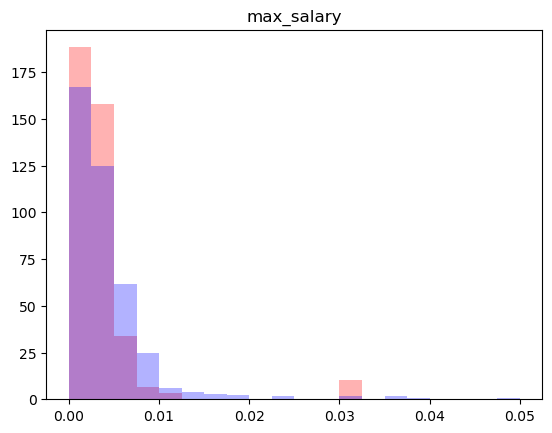

In [110]:
df_normalized=df_normalized.loc[(df['has_salary_range'] != 0.0), :]
df_train = df_train.loc[(df['has_salary_range'] != 0.0), :]
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(1,len(cols)):
    fig= plt.figure()
    plt.plot(df_normalized[cols[i]],df_train['fraudulent'],'o',alpha=0.1)
    plt.title(cols[i])
#plt.plot(df_normalized["salary_ratio"],df_train['fraudulent'],'o')
plt.show()

df_normalized_fraud = df_normalized[df_train['fraudulent']==1]
df_normalized_job = df_normalized[df_train['fraudulent']==0]

for i in range(1,len(cols)):
    fig= plt.figure()
    plt.hist(df_normalized_fraud[cols[i]],bins=20,density=True,alpha=0.3,color='red',range=(0,1))
    plt.hist(df_normalized_job[cols[i]],bins=20,density=True,alpha=0.3,color='blue',range=(0,1))
    plt.title(cols[i])
#plt.plot(df_normalized["salary_ratio"],df_train['fraudulent'],'o')
plt.show()
for i in range(1,3):
    fig=plt.figure()
    plt.hist(df_normalized_fraud[cols[i]],bins=20,density=True,alpha=0.3,color='red',range=(0,0.05))
    plt.hist(df_normalized_job[cols[i]],bins=20,density=True,alpha=0.3,color='blue',range=(0,0.05))
    plt.title(cols[i])
plt.show()

### Conclusion

Without interaction:
**has_salary_range** is the most valuable data point here!

**salary_string_len** is another candidate, if you group it by critical bins!

**salary_ratio** is an interesting feature too, but it will most likely be too complicated to actually use it.

One valid option is to combine the salary features with the geo-location values and/or with the experience, department etc values.